In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from highlight_text import HighlightText, ax_text, fig_text
import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/Thiagobc23/ad8f40e94f13433c64f1a14ce9f8179b/raw/220067e9eb2c9dd37e6a1a7968474154a2b35fd9/leo_gf.csv')
df.head()

,year,gf,gf_age,leo_age
0,1998,Gisele Bundchen,18,24
1,1999,Gisele Bundchen,19,25
2,2000,Gisele Bundchen,20,26
3,2001,Gisele Bundchen,21,27
4,2002,Gisele Bundchen,22,28


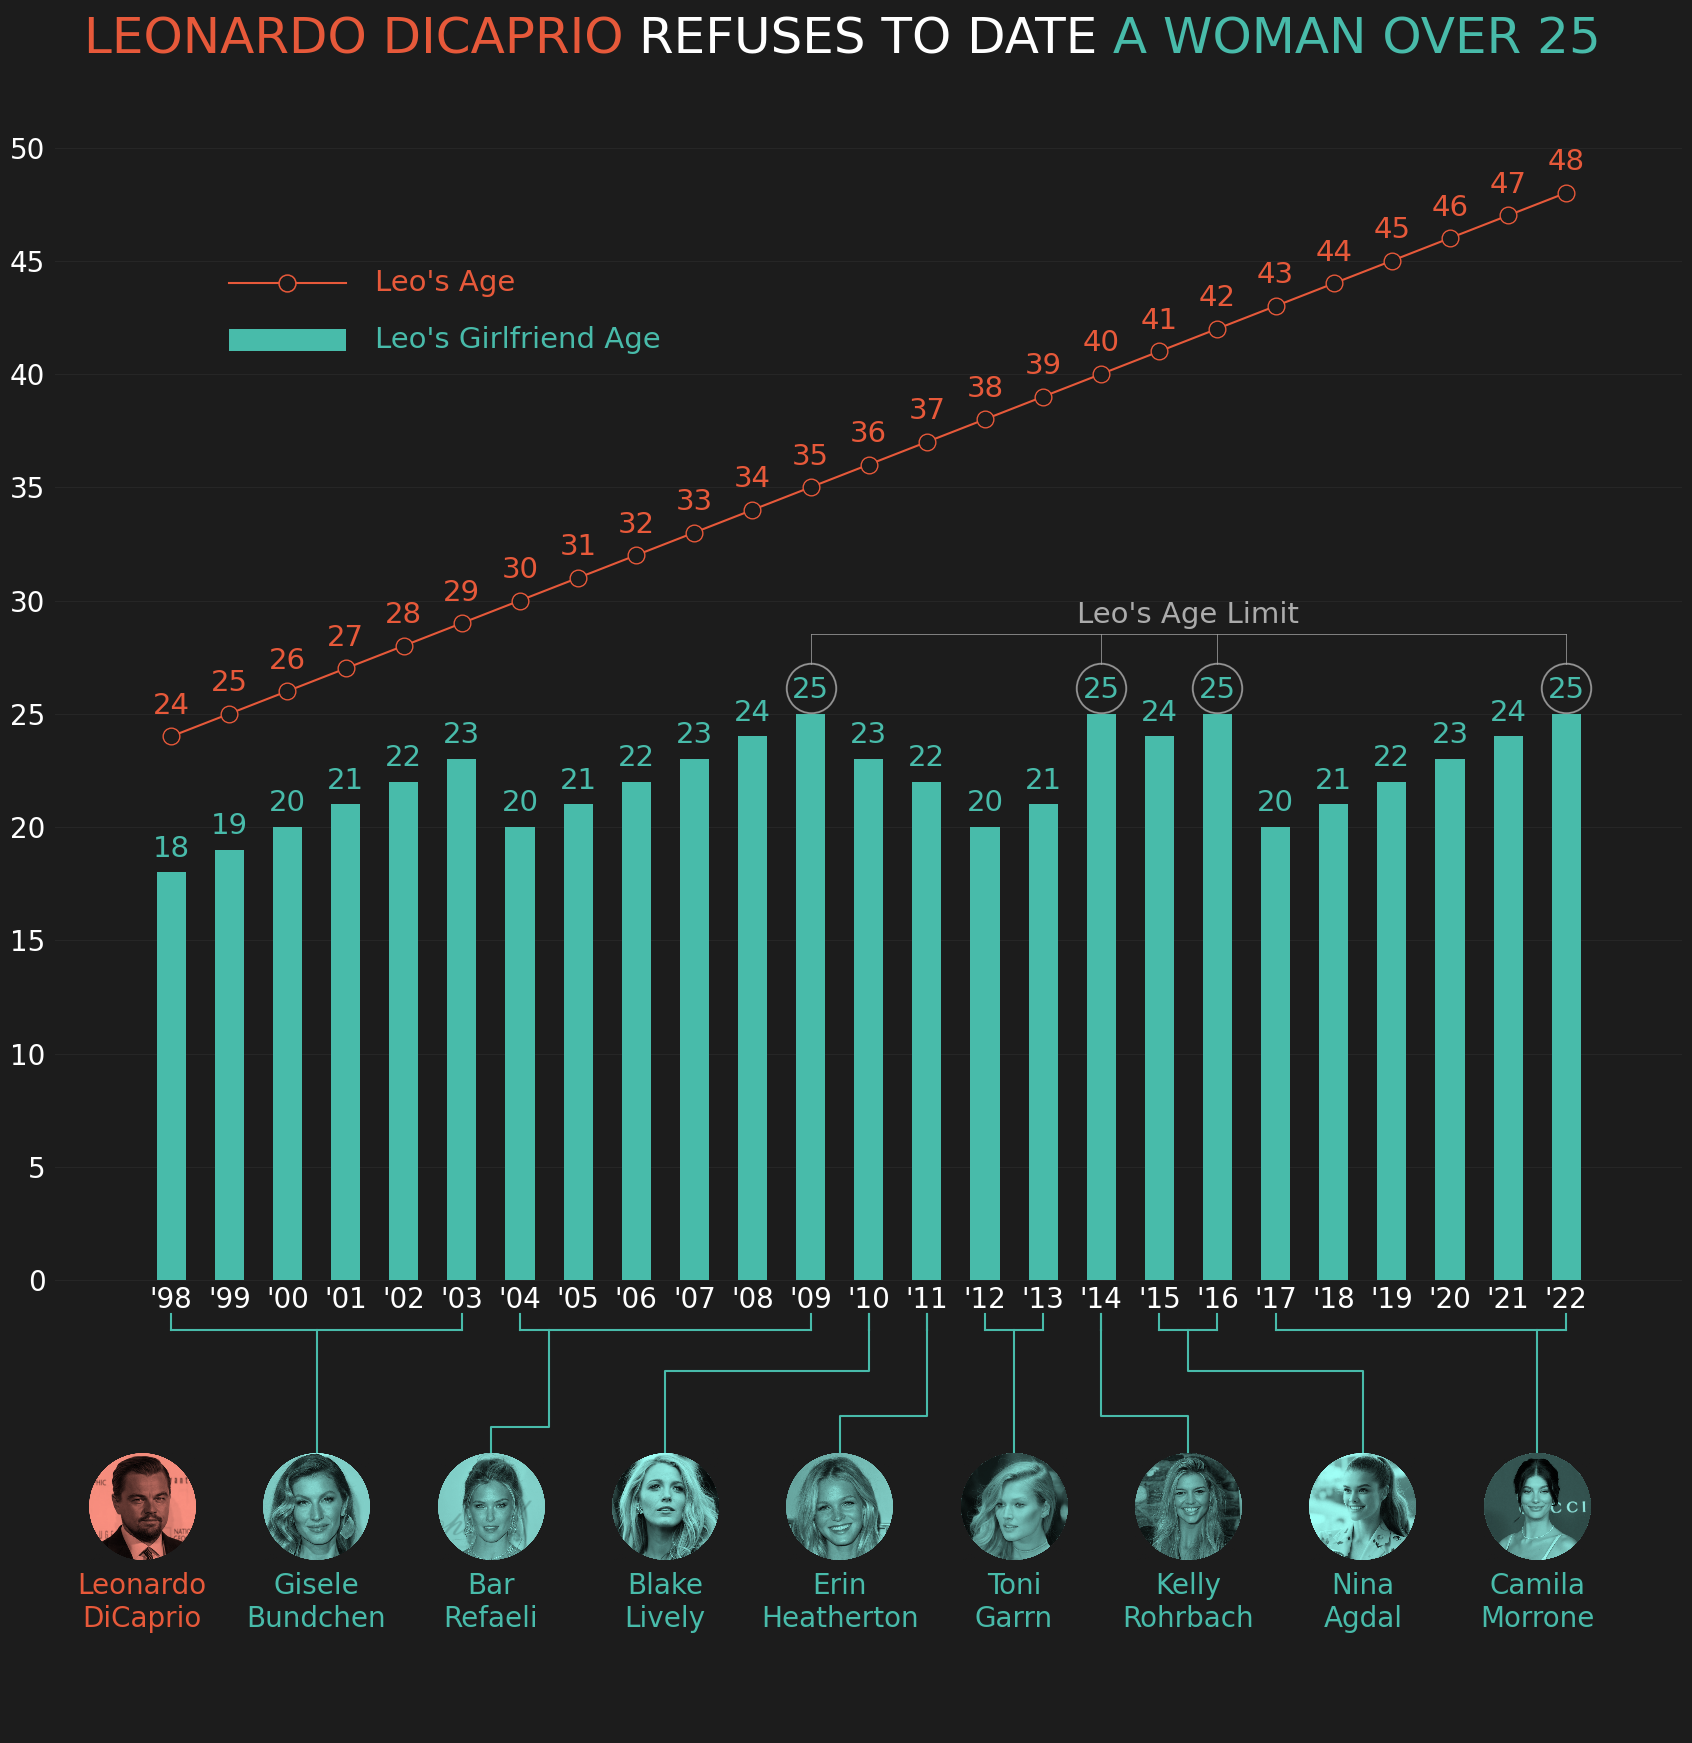

In [3]:
##################
### SET FIGURE ###
##################
fig, ax = plt.subplots(1, figsize=(21, 21), facecolor='#1C1C1C', dpi=100)
ax.set_facecolor('#1C1C1C')

###################
### PLOT CHARTS ###
###################
# Leo's line
plt.plot(df.year, df.leo_age, marker='o', markersize=12, color='#E7593A')
plt.scatter(df.year, df.leo_age, s=100, c='#1C1C1C', zorder=99)
# GFs bars
plt.bar(df.year, df.gf_age, width=0.5, color='#48BBAA')

#################
### AGE LIMIT ###
#################
df_limit = df[df['gf_age'] == 25]

# circle the number labels
plt.scatter(df_limit.year, df_limit.gf_age+1.15, s=1300, c='#ABABAB', alpha=0.7)
plt.scatter(df_limit.year, df_limit.gf_age+1.15, s=1100, c='#1C1C1C')

# horizontal line on top of limit
plt.plot([df_limit.year.min(), df_limit.year.max()], [28.5, 28.5], c='#ABABAB', lw=0.5)

# vertical lines to each limit
for idx, value in df_limit.iterrows():
    plt.plot([value.year]*2, [27.2, 28.5], color='#ABABAB', lw=0.5)
    
# annotate age limit
age_limit_txt = "Leo's Age Limit"
age_limit_x = (df_limit.year.min() + df_limit.year.max()) /2
plt.text(age_limit_x, 29, age_limit_txt, ha='center', color='#ABABAB', fontsize=21)


##############    
### LABELS ###
##############
for i in range(len(df)):
    # gf age
    plt.text(df.year[i], df.gf_age[i]+0.7, df.gf_age[i], ha='center', color='#48BBAA', fontsize=21)
    # leo age
    plt.text(df.year[i], df.leo_age[i]+1, df.leo_age[i], ha='center', color='#E7593A', fontsize=21)

#############
### TICKS ###
#############
# set ticks and labels
#plt.xticks(df.year, ["'"+str(i)[2:] for i in df.year.values], color='w', fontsize=21)

for i in df.year.values:
    plt.text(i, -0.25, "'"+str(i)[2:], va='top', ha='center', color='w', fontsize=20)
plt.xticks([])
plt.yticks(np.arange(0,51,5), color='w', fontsize=20)

# remove tick lines
plt.tick_params(bottom=False, left=False)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False) 
ax.spines['top'].set_visible(False)

# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='solid', alpha=0.1)

# x and y limits
plt.ylim(-20, 50)
plt.xlim(1996, 2024)

##############
### LEGEND ###
##############

plt.plot([1999, 2001], [44,44], color='#E7593A') #, marker='o', markersize=12, color='#E7593A'
plt.scatter([2000], [44], s=150, c='#E7593A', zorder=99)
plt.scatter([2000], [44], s=100, c='#1C1C1C', zorder=99)

plt.text(2001.5, 44, "Leo's Age", color='#E7593A', va='center', fontsize=21)

plt.bar(2000, 1, bottom=41, color='#48BBAA', width=2)
plt.text(2001.5, 41.5, "Leo's Girlfriend Age", color='#48BBAA', va='center', fontsize=21)

#############
### TITLE ###
#############
# set properties
highlight_textprops = [{"fontsize":36, "color":'#E7593A'},
                       {"fontsize":36, "color":'w'},
                       {"fontsize":36, "color":'#48BBAA'}]
# write title
fig_text(x=0.5, y=0.92, va='bottom', ha='center',
         s='<LEONARDO DICAPRIO ><REFUSES TO DATE>< A WOMAN OVER 25>',
         highlight_textprops=highlight_textprops,
         ax=ax)

############
### PICS ###
############

pics = ['leo','gisele','bar','blake','erin','toni','kelly','nina','camila']
names = ['Leonardo DiCaprio'] + df.gf.unique().tolist()
names = [i.replace(' ', '\n') for i in names]
txt_c = '#E7593A'

pic_x = 1997.5
for idx, p in enumerate(pics):
    img = mpimg.imread(f"leos gf\\{p}.png")
    
    imagebox = OffsetImage(img, zoom=0.16)
    ab = AnnotationBbox(imagebox, (pic_x, -10), frameon = False)
    ax.add_artist(ab)
    
    plt.text(pic_x, -15.3, names[idx], color=txt_c, ha='center', fontsize=20)
    txt_c = '#48BBAA'
    pic_x = pic_x + 3
        
###############
### DIAGRAM ###
###############

vlines = df.groupby('gf').describe()['year'][['min','max']].values.flatten()
for i in vlines:
    plt.plot([i,i], [-1.5, -2.2], color='#48BBAA')

hlines = [[1998, 2003],
        [2004, 2009],
        [2012, 2013],
        [2015, 2016],
        [2017, 2022]]

for i in hlines:
    plt.plot(i, [-2.2, -2.2], color='#48BBAA')
    
connections = [[[2000.5, 2000.5], [-10, -2.2]],#g
            [[2003.5, 2003.5, 2004.5, 2004.5], [-10, -6.5, -6.5, -2.2]],#bar
            [[2006.5, 2006.5, 2010, 2010], [-10, -4, -4, -2.2]],#bla
            [[2009.5, 2009.5, 2011, 2011], [-10, -6, -6, -2.2]],#e
            [[2012.5, 2012.5], [-10, -2.2]],#t
            [[2015.5, 2015.5, 2014, 2014], [-10, -6, -6, -2.2]],#k
            [[2018.5, 2018.5, 2015.5, 2015.5], [-10, -4, -4, -2.2]], #n
            [[2021.5, 2021.5], [-10, -2.2]]] #c

for c in connections:
    plt.plot(c[0], c[1], color='#48BBAA')

#################
### SAVE .PNG ###
#################
plt.savefig('leo.png', facecolor='#1C1C1C')